In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


import functions


In [78]:
# Define the start and end dates for the filter
start_date = "1990-07-31"
end_date = "2021-06-30"

# Convert column D to datetime if it isn't already


# Filter the DataFrame for the specified date range
def prepare_dfcount_for_plot(dfcount):
    dfcount['D'] = pd.to_datetime(dfcount['D'])
    dfcount = dfcount[(dfcount['D'] >= start_date) & (dfcount['D'] <= end_date)]

    dfcount = dfcount.rename(columns={'D_year': 'year', 'D_month': 'month'})
    dfcount = dfcount.drop('D', axis = 1)
    dfcount['date_id'] = dfcount['year'].astype(str)+ "_" + dfcount['month'].astype(str)
    melted = pd.melt(dfcount, id_vars=['date_id', 'year', 'month'], var_name='elevation', value_name='dfs_count')
    
    # melted = pd.melt(dfcount, id_vars=['date_id'], var_name='elevation', value_name='dfs_count')
    melted['elevation'] = melted['elevation'].str.split('.').str[0].astype(float)
    melted['elevation_bin'] = melted.apply(functions.bin_elevation500, axis=1)
    # create unique id for elevation and month for merging
    melted['elevation'] = melted['elevation'].astype(int)
    melted['id'] = melted.index.astype(str)+ "_" + melted['elevation'].astype(str) + "_" + melted['year'].astype(str)+ "_" + melted['month'].astype(str)
    
    # melted = melted.sort_values('elevation_bin')
    # melted = melted.dropna(subset=['dfs_count'])
    return melted 




def calculate_floods(df, method):
    # df percent 
    df[f'dfs_count_{method}60_percent'] = (df[f'dfs_count_{method}60'] *100) / df.dfspot_count
    df[f'dfs_count_{method}50_percent'] = (df[f'dfs_count_{method}50'] *100) / df.dfspot_count
    df[f'dfs_count_{method}40_percent'] = (df[f'dfs_count_{method}40'] *100) / df.dfspot_count
    df[f'dfs_count_{method}30_percent'] = (df[f'dfs_count_{method}30'] *100) / df.dfspot_count
    df[f'dfs_count_{method}20_percent'] = (df[f'dfs_count_{method}20'] *100) / df.dfspot_count
    # ff count 
    df[f'ffs_count_{method}60'] = df.dfspot_count - df[f'dfs_count_{method}60']
    df[f'ffs_count_{method}50'] = df.dfspot_count - df[f'dfs_count_{method}50']
    df[f'ffs_count_{method}40'] = df.dfspot_count - df[f'dfs_count_{method}40']
    df[f'ffs_count_{method}30'] = df.dfspot_count - df[f'dfs_count_{method}30']
    df[f'ffs_count_{method}20'] = df.dfspot_count - df[f'dfs_count_{method}20']
    # ff percent
    df[f'ffs_count_{method}60_percent'] = (df[f'ffs_count_{method}60'] *100) / df.dfspot_count
    df[f'ffs_count_{method}50_percent'] = (df[f'ffs_count_{method}50'] *100) / df.dfspot_count
    df[f'ffs_count_{method}40_percent'] = (df[f'ffs_count_{method}40'] *100) / df.dfspot_count
    df[f'ffs_count_{method}30_percent'] = (df[f'ffs_count_{method}30'] *100) / df.dfspot_count
    df[f'ffs_count_{method}20_percent'] = (df[f'ffs_count_{method}20'] *100) / df.dfspot_count
    return df




import pandas as pd

def merge_landcover_dfs(dfs, dfspot, merge_on, dfspot_column):
    """
    Merges a list of dataframes on specified columns and adds a column from a 'dfspot' dataframe.
    
    Parameters:
        dfs (list of pd.DataFrame): List of dataframes to merge sequentially.
        dfspot (pd.DataFrame): A dataframe containing a column to add after the merges.
        merge_on (list of str): Columns to use as the merge keys.
        dfspot_column (str): The name of the column in `dfspot` to add after merging.
        
    Returns:
        pd.DataFrame: The merged dataframe with the additional column from `dfspot`.
    """
    
    # Start with the first dataframe in `dfs` and automatically get the count column
    count_column = [col for col in dfs[0].columns if col.startswith('dfs_count')][0]
    merged_df = dfs[0][merge_on + [count_column]]
    
    # Iterate over remaining dataframes and merge each sequentially
    for df in dfs[1:]:
        count_column = [col for col in df.columns if col.startswith('dfs_count')][0]
        merged_df = pd.merge(merged_df, df[merge_on + [count_column]], on=merge_on)
    
    # Add the `dfspot_column` from `dfspot` dataframe to the merged dataframe
    merged_df['dfspot_count'] = dfspot[dfspot_column]
    
    return merged_df


In [79]:
freq = 'monthly'
column = 'dfspot'
location = 'langtang'


flood_folder = f'/Users/varyabazilova/Desktop/paper2/202406_modelruns/30years/2024Nov_output/TL/'
dfspot1 = pd.read_csv(flood_folder + f'{location}_{freq}_{column}_count_landcover1.csv', index_col = 0).fillna(0)
dfspot2 = pd.read_csv(flood_folder + f'{location}_{freq}_{column}_count_landcover2.csv', index_col = 0).fillna(0)
dfspot3 = pd.read_csv(flood_folder + f'{location}_{freq}_{column}_count_landcover3.csv', index_col = 0).fillna(0)
dfspot4 = pd.read_csv(flood_folder + f'{location}_{freq}_{column}_count_landcover4.csv', index_col = 0).fillna(0)


dfspot1_melted = prepare_dfcount_for_plot(dfspot1)
dfspot2_melted = prepare_dfcount_for_plot(dfspot2)
dfspot3_melted = prepare_dfcount_for_plot(dfspot3)
dfspot4_melted = prepare_dfcount_for_plot(dfspot4)


In [80]:
dfspot2_melted

,date_id,year,month,elevation,dfs_count,elevation_bin,id
0,1990_7,1990,7,4485,1.0,4000 - 4500,0_4485_1990_7
1,1990_8,1990,8,4485,2.0,4000 - 4500,1_4485_1990_8
2,1990_9,1990,9,4485,1.0,4000 - 4500,2_4485_1990_9
3,1990_10,1990,10,4485,0.0,4000 - 4500,3_4485_1990_10
4,1990_11,1990,11,4485,0.0,4000 - 4500,4_4485_1990_11
...,...,...,...,...,...,...,...
19339,2021_2,2021,2,5936,0.0,5500 - 6000,19339_5936_2021_2
19340,2021_3,2021,3,5936,0.0,5500 - 6000,19340_5936_2021_3
19341,2021_4,2021,4,5936,0.0,5500 - 6000,19341_5936_2021_4
19342,2021_5,2021,5,5936,0.0,5500 - 6000,19342_5936_2021_5


# daily input 

In [6]:
path = '/Users/varyabazilova/Desktop/paper2/202406_modelruns/30years/2024Nov_output/SL_daily/'

daily20_lc1 = pd.read_csv(path + f'output_20percent/{location}_{freq}_dfs_count_20percent_landcover1.csv', index_col = 0).fillna(0)
daily20_lc2 = pd.read_csv(path + f'output_20percent/{location}_{freq}_dfs_count_20percent_landcover2.csv', index_col = 0).fillna(0)
daily20_lc3 = pd.read_csv(path + f'output_20percent/{location}_{freq}_dfs_count_20percent_landcover3.csv', index_col = 0).fillna(0)
daily20_lc4 = pd.read_csv(path + f'output_20percent/{location}_{freq}_dfs_count_20percent_landcover4.csv', index_col = 0).fillna(0)

daily30_lc1 = pd.read_csv(path + f'output_30percent/{location}_{freq}_dfs_count_30percent_landcover1.csv', index_col = 0).fillna(0)
daily30_lc2 = pd.read_csv(path + f'output_30percent/{location}_{freq}_dfs_count_30percent_landcover2.csv', index_col = 0).fillna(0)
daily30_lc3 = pd.read_csv(path + f'output_30percent/{location}_{freq}_dfs_count_30percent_landcover3.csv', index_col = 0).fillna(0)
daily30_lc4 = pd.read_csv(path + f'output_30percent/{location}_{freq}_dfs_count_30percent_landcover4.csv', index_col = 0).fillna(0)

daily40_lc1 = pd.read_csv(path + f'output_40percent/{location}_{freq}_dfs_count_40percent_landcover1.csv', index_col = 0).fillna(0)
daily40_lc2 = pd.read_csv(path + f'output_40percent/{location}_{freq}_dfs_count_40percent_landcover2.csv', index_col = 0).fillna(0)
daily40_lc3 = pd.read_csv(path + f'output_40percent/{location}_{freq}_dfs_count_40percent_landcover3.csv', index_col = 0).fillna(0)
daily40_lc4 = pd.read_csv(path + f'output_40percent/{location}_{freq}_dfs_count_40percent_landcover4.csv', index_col = 0).fillna(0)

daily50_lc1 = pd.read_csv(path + f'output_50percent/{location}_{freq}_dfs_count_50percent_landcover1.csv', index_col = 0).fillna(0)
daily50_lc2 = pd.read_csv(path + f'output_50percent/{location}_{freq}_dfs_count_50percent_landcover2.csv', index_col = 0).fillna(0)
daily50_lc3 = pd.read_csv(path + f'output_50percent/{location}_{freq}_dfs_count_50percent_landcover3.csv', index_col = 0).fillna(0)
daily50_lc4 = pd.read_csv(path + f'output_50percent/{location}_{freq}_dfs_count_50percent_landcover4.csv', index_col = 0).fillna(0)

daily60_lc1 = pd.read_csv(path + f'output_60percent/{location}_{freq}_dfs_count_60percent_landcover1.csv', index_col = 0).fillna(0)
daily60_lc2 = pd.read_csv(path + f'output_60percent/{location}_{freq}_dfs_count_60percent_landcover2.csv', index_col = 0).fillna(0)
daily60_lc3 = pd.read_csv(path + f'output_60percent/{location}_{freq}_dfs_count_60percent_landcover3.csv', index_col = 0).fillna(0)
daily60_lc4 = pd.read_csv(path + f'output_60percent/{location}_{freq}_dfs_count_60percent_landcover4.csv', index_col = 0).fillna(0)



#  -----

daily20_lc1_melted = prepare_dfcount_for_plot(daily20_lc1).rename(columns={'dfs_count': 'dfs_count_daily20'})
daily20_lc2_melted = prepare_dfcount_for_plot(daily20_lc2).rename(columns={'dfs_count': 'dfs_count_daily20'})
daily20_lc3_melted = prepare_dfcount_for_plot(daily20_lc3).rename(columns={'dfs_count': 'dfs_count_daily20'})
daily20_lc4_melted = prepare_dfcount_for_plot(daily20_lc4).rename(columns={'dfs_count': 'dfs_count_daily20'})

daily30_lc1_melted = prepare_dfcount_for_plot(daily30_lc1).rename(columns={'dfs_count': 'dfs_count_daily30'})
daily30_lc2_melted = prepare_dfcount_for_plot(daily30_lc2).rename(columns={'dfs_count': 'dfs_count_daily30'})
daily30_lc3_melted = prepare_dfcount_for_plot(daily30_lc3).rename(columns={'dfs_count': 'dfs_count_daily30'})
daily30_lc4_melted = prepare_dfcount_for_plot(daily30_lc4).rename(columns={'dfs_count': 'dfs_count_daily30'})

daily40_lc1_melted = prepare_dfcount_for_plot(daily40_lc1).rename(columns={'dfs_count': 'dfs_count_daily40'})
daily40_lc2_melted = prepare_dfcount_for_plot(daily40_lc2).rename(columns={'dfs_count': 'dfs_count_daily40'})
daily40_lc3_melted = prepare_dfcount_for_plot(daily40_lc3).rename(columns={'dfs_count': 'dfs_count_daily40'})
daily40_lc4_melted = prepare_dfcount_for_plot(daily40_lc4).rename(columns={'dfs_count': 'dfs_count_daily40'})

daily50_lc1_melted = prepare_dfcount_for_plot(daily50_lc1).rename(columns={'dfs_count': 'dfs_count_daily50'})
daily50_lc2_melted = prepare_dfcount_for_plot(daily50_lc2).rename(columns={'dfs_count': 'dfs_count_daily50'})
daily50_lc3_melted = prepare_dfcount_for_plot(daily50_lc3).rename(columns={'dfs_count': 'dfs_count_daily50'})
daily50_lc4_melted = prepare_dfcount_for_plot(daily50_lc4).rename(columns={'dfs_count': 'dfs_count_daily50'})

daily60_lc1_melted = prepare_dfcount_for_plot(daily60_lc1).rename(columns={'dfs_count': 'dfs_count_daily60'})
daily60_lc2_melted = prepare_dfcount_for_plot(daily60_lc2).rename(columns={'dfs_count': 'dfs_count_daily60'})
daily60_lc3_melted = prepare_dfcount_for_plot(daily60_lc3).rename(columns={'dfs_count': 'dfs_count_daily60'})
daily60_lc4_melted = prepare_dfcount_for_plot(daily60_lc4).rename(columns={'dfs_count': 'dfs_count_daily60'})


In [7]:
dfs1 = [daily20_lc1_melted, daily30_lc1_melted, daily40_lc1_melted, daily50_lc1_melted, daily60_lc1_melted]
dfs2 = [daily20_lc2_melted, daily30_lc2_melted, daily40_lc2_melted, daily50_lc2_melted, daily60_lc2_melted]
dfs3 = [daily20_lc3_melted, daily30_lc3_melted, daily40_lc3_melted, daily50_lc3_melted, daily60_lc3_melted]
dfs4 = [daily20_lc4_melted, daily30_lc4_melted, daily40_lc4_melted, daily50_lc4_melted, daily60_lc4_melted]

merge_on = ['year', 'month', 'elevation', 'elevation_bin', 'id']
dfspot_column = 'dfs_count'

lc1_daily = merge_landcover_dfs(dfs1, dfspot1_melted, merge_on, dfspot_column)
lc2_daily = merge_landcover_dfs(dfs2, dfspot2_melted, merge_on, dfspot_column)
lc3_daily = merge_landcover_dfs(dfs3, dfspot3_melted, merge_on, dfspot_column)
lc4_daily = merge_landcover_dfs(dfs4, dfspot4_melted, merge_on, dfspot_column)


In [8]:
lc1_daily = calculate_floods(lc1_daily, 'daily').fillna(0)
lc2_daily = calculate_floods(lc2_daily, 'daily')#.fillna(0)
lc3_daily = calculate_floods(lc3_daily, 'daily')#.fillna(0)
lc4_daily = calculate_floods(lc4_daily, 'daily')#.fillna(0)


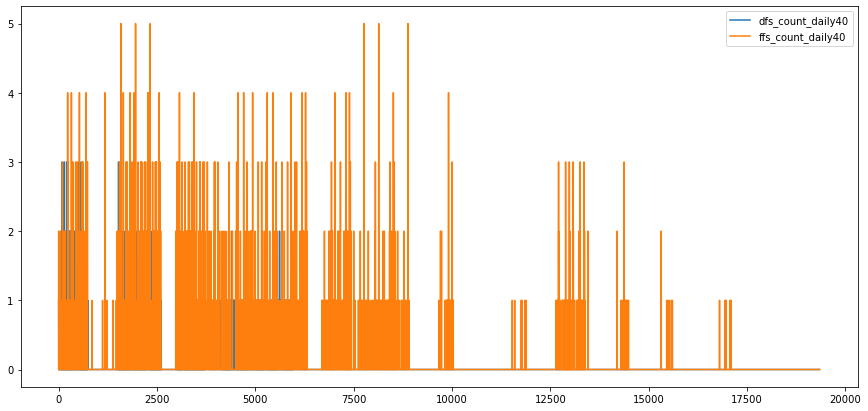

In [10]:
# lc2_daily.dfspot_count.plot(figsize = (15, 7))

lc1_daily.dfs_count_daily40.plot(figsize = (15, 7))
# lc2_daily.dfs_count_daily40.plot(figsize = (15, 7))
lc2_daily.ffs_count_daily40.plot(figsize = (15, 7))
# lc4_daily.dfs_count_daily40.plot(figsize = (15, 7))

plt.legend()

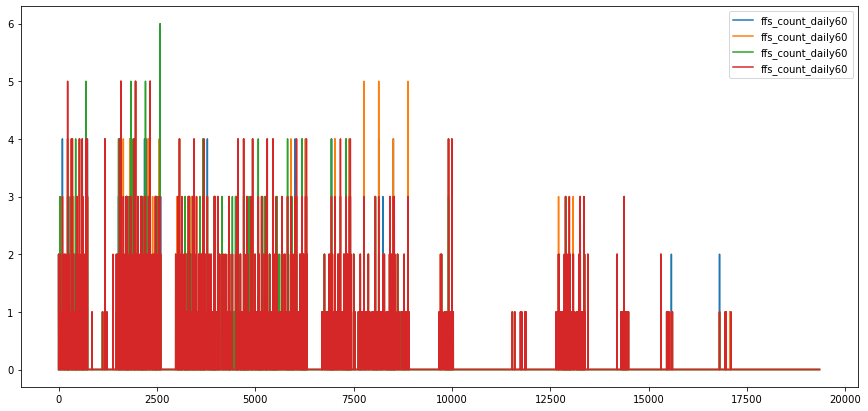

In [17]:
lc1_daily.ffs_count_daily60.plot(figsize = (15, 7))
lc2_daily.ffs_count_daily60.plot(figsize = (15, 7))
lc3_daily.ffs_count_daily60.plot(figsize = (15, 7))
lc4_daily.ffs_count_daily60.plot(figsize = (15, 7))

plt.legend()

# once per year input

In [18]:
path = '/Users/varyabazilova/Desktop/paper2/202406_modelruns/30years/2024Nov_output/SL_once/'

once20_lc1 = pd.read_csv(path + f'output_20percent/{location}_{freq}_dfs_count_20percent_landcover1.csv', index_col = 0).fillna(0)
once20_lc2 = pd.read_csv(path + f'output_20percent/{location}_{freq}_dfs_count_20percent_landcover2.csv', index_col = 0).fillna(0)
once20_lc3 = pd.read_csv(path + f'output_20percent/{location}_{freq}_dfs_count_20percent_landcover3.csv', index_col = 0).fillna(0)
once20_lc4 = pd.read_csv(path + f'output_20percent/{location}_{freq}_dfs_count_20percent_landcover4.csv', index_col = 0).fillna(0)

once30_lc1 = pd.read_csv(path + f'output_30percent/{location}_{freq}_dfs_count_30percent_landcover1.csv', index_col = 0).fillna(0)
once30_lc2 = pd.read_csv(path + f'output_30percent/{location}_{freq}_dfs_count_30percent_landcover2.csv', index_col = 0).fillna(0)
once30_lc3 = pd.read_csv(path + f'output_30percent/{location}_{freq}_dfs_count_30percent_landcover3.csv', index_col = 0).fillna(0)
once30_lc4 = pd.read_csv(path + f'output_30percent/{location}_{freq}_dfs_count_30percent_landcover4.csv', index_col = 0).fillna(0)

once40_lc1 = pd.read_csv(path + f'output_40percent/{location}_{freq}_dfs_count_40percent_landcover1.csv', index_col = 0).fillna(0)
once40_lc2 = pd.read_csv(path + f'output_40percent/{location}_{freq}_dfs_count_40percent_landcover2.csv', index_col = 0).fillna(0)
once40_lc3 = pd.read_csv(path + f'output_40percent/{location}_{freq}_dfs_count_40percent_landcover3.csv', index_col = 0).fillna(0)
once40_lc4 = pd.read_csv(path + f'output_40percent/{location}_{freq}_dfs_count_40percent_landcover4.csv', index_col = 0).fillna(0)

once50_lc1 = pd.read_csv(path + f'output_50percent/{location}_{freq}_dfs_count_50percent_landcover1.csv', index_col = 0).fillna(0)
once50_lc2 = pd.read_csv(path + f'output_50percent/{location}_{freq}_dfs_count_50percent_landcover2.csv', index_col = 0).fillna(0)
once50_lc3 = pd.read_csv(path + f'output_50percent/{location}_{freq}_dfs_count_50percent_landcover3.csv', index_col = 0).fillna(0)
once50_lc4 = pd.read_csv(path + f'output_50percent/{location}_{freq}_dfs_count_50percent_landcover4.csv', index_col = 0).fillna(0)

once60_lc1 = pd.read_csv(path + f'output_60percent/{location}_{freq}_dfs_count_60percent_landcover1.csv', index_col = 0).fillna(0)
once60_lc2 = pd.read_csv(path + f'output_60percent/{location}_{freq}_dfs_count_60percent_landcover2.csv', index_col = 0).fillna(0)
once60_lc3 = pd.read_csv(path + f'output_60percent/{location}_{freq}_dfs_count_60percent_landcover3.csv', index_col = 0).fillna(0)
once60_lc4 = pd.read_csv(path + f'output_60percent/{location}_{freq}_dfs_count_60percent_landcover4.csv', index_col = 0).fillna(0)



#  -----

once20_lc1_melted = prepare_dfcount_for_plot(once20_lc1).rename(columns={'dfs_count': 'dfs_count_once20'})
once20_lc2_melted = prepare_dfcount_for_plot(once20_lc2).rename(columns={'dfs_count': 'dfs_count_once20'})
once20_lc3_melted = prepare_dfcount_for_plot(once20_lc3).rename(columns={'dfs_count': 'dfs_count_once20'})
once20_lc4_melted = prepare_dfcount_for_plot(once20_lc4).rename(columns={'dfs_count': 'dfs_count_once20'})
once30_lc1_melted = prepare_dfcount_for_plot(once30_lc1).rename(columns={'dfs_count': 'dfs_count_once30'})
once30_lc2_melted = prepare_dfcount_for_plot(once30_lc2).rename(columns={'dfs_count': 'dfs_count_once30'})
once30_lc3_melted = prepare_dfcount_for_plot(once30_lc3).rename(columns={'dfs_count': 'dfs_count_once30'})
once30_lc4_melted = prepare_dfcount_for_plot(once30_lc4).rename(columns={'dfs_count': 'dfs_count_once30'})
once40_lc1_melted = prepare_dfcount_for_plot(once40_lc1).rename(columns={'dfs_count': 'dfs_count_once40'})
once40_lc2_melted = prepare_dfcount_for_plot(once40_lc2).rename(columns={'dfs_count': 'dfs_count_once40'})
once40_lc3_melted = prepare_dfcount_for_plot(once40_lc3).rename(columns={'dfs_count': 'dfs_count_once40'})
once40_lc4_melted = prepare_dfcount_for_plot(once40_lc4).rename(columns={'dfs_count': 'dfs_count_once40'})
once50_lc1_melted = prepare_dfcount_for_plot(once50_lc1).rename(columns={'dfs_count': 'dfs_count_once50'})
once50_lc2_melted = prepare_dfcount_for_plot(once50_lc2).rename(columns={'dfs_count': 'dfs_count_once50'})
once50_lc3_melted = prepare_dfcount_for_plot(once50_lc3).rename(columns={'dfs_count': 'dfs_count_once50'})
once50_lc4_melted = prepare_dfcount_for_plot(once50_lc4).rename(columns={'dfs_count': 'dfs_count_once50'})
once60_lc1_melted = prepare_dfcount_for_plot(once60_lc1).rename(columns={'dfs_count': 'dfs_count_once60'})
once60_lc2_melted = prepare_dfcount_for_plot(once60_lc2).rename(columns={'dfs_count': 'dfs_count_once60'})
once60_lc3_melted = prepare_dfcount_for_plot(once60_lc3).rename(columns={'dfs_count': 'dfs_count_once60'})
once60_lc4_melted = prepare_dfcount_for_plot(once60_lc4).rename(columns={'dfs_count': 'dfs_count_once60'})


In [19]:
dfs1 = [once20_lc1_melted, once30_lc1_melted, once40_lc1_melted, once50_lc1_melted, once60_lc1_melted]
dfs2 = [once20_lc2_melted, once30_lc2_melted, once40_lc2_melted, once50_lc2_melted, once60_lc2_melted]
dfs3 = [once20_lc3_melted, once30_lc3_melted, once40_lc3_melted, once50_lc3_melted, once60_lc3_melted]
dfs4 = [once20_lc4_melted, once30_lc4_melted, once40_lc4_melted, once50_lc4_melted, once60_lc4_melted]

merge_on = ['year', 'month', 'elevation', 'elevation_bin', 'id']
dfspot_column = 'dfs_count'

lc1_once = merge_landcover_dfs(dfs1, dfspot1_melted, merge_on, dfspot_column)
lc2_once = merge_landcover_dfs(dfs2, dfspot2_melted, merge_on, dfspot_column)
lc3_once = merge_landcover_dfs(dfs3, dfspot3_melted, merge_on, dfspot_column)
lc4_once = merge_landcover_dfs(dfs4, dfspot4_melted, merge_on, dfspot_column)


In [20]:
lc1_once = calculate_floods(lc1_once, 'once')
lc2_once = calculate_floods(lc2_once, 'once')
lc3_once = calculate_floods(lc3_once, 'once')
lc4_once = calculate_floods(lc4_once, 'once')


# plots for all 

- heatmaps? 
- think cleverly of how you want to represent and what 


<AxesSubplot:label='d', xlabel='month', ylabel='dfspot_count'>

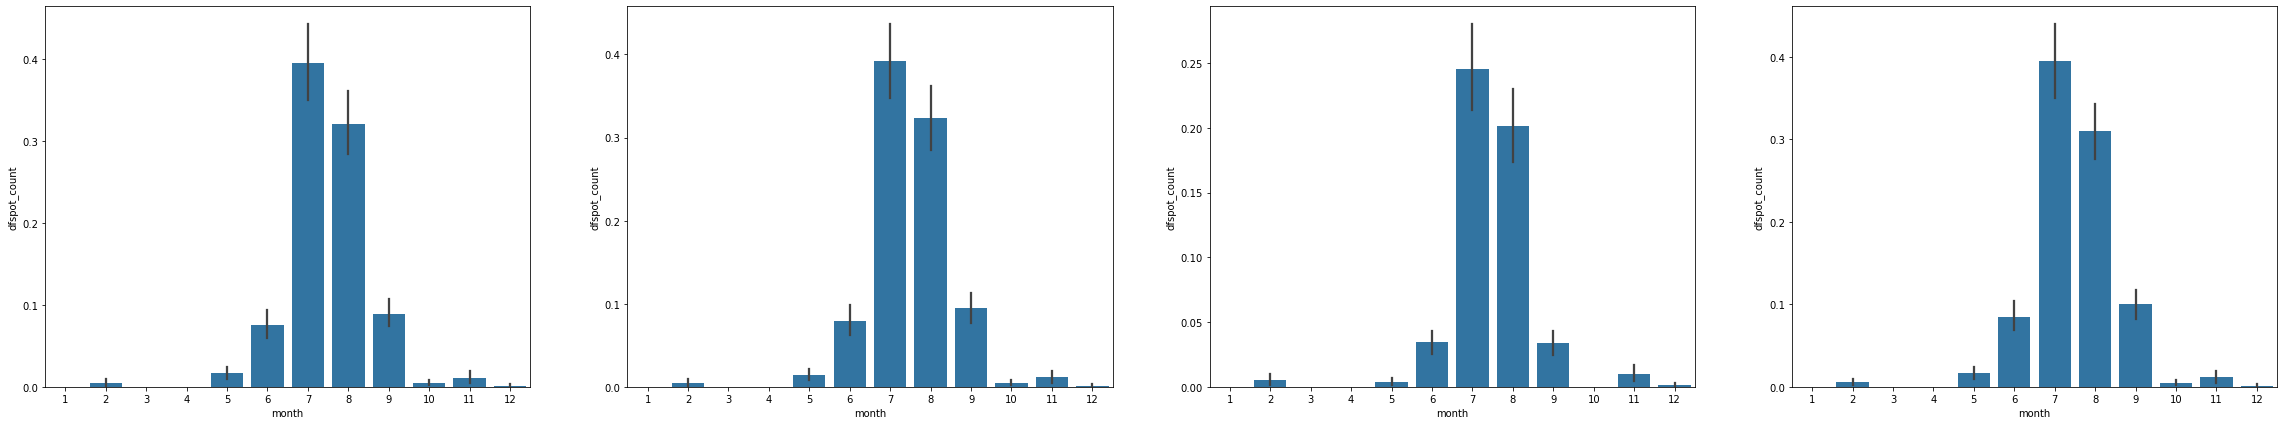

In [47]:
fig = plt.figure(figsize=(40, 7))#, layout = 'tight')
mosaic = fig.subplot_mosaic('''
                            abcd
                            ''')

sns.barplot(ax = mosaic['a'], data=lc1_daily, x="month", y="dfspot_count")
sns.barplot(ax = mosaic['b'], data=lc2_daily, x="month", y="dfspot_count")
sns.barplot(ax = mosaic['c'], data=lc3_daily, x="month", y="dfspot_count")
sns.barplot(ax = mosaic['d'], data=lc4_daily, x="month", y="dfspot_count")


In [46]:
lc1_daily

,year,month,elevation,elevation_bin,id,dfs_count_daily20,dfs_count_daily30,dfs_count_daily40,dfs_count_daily50,dfs_count_daily60,...,ffs_count_daily60,ffs_count_daily50,ffs_count_daily40,ffs_count_daily30,ffs_count_daily20,ffs_count_daily60_percent,ffs_count_daily50_percent,ffs_count_daily40_percent,ffs_count_daily30_percent,ffs_count_daily20_percent
0,1990,7,4485,4000 - 4500,0_4485_1990_7,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1990,8,4485,4000 - 4500,1_4485_1990_8,0.0,0.0,0.0,0.0,0.0,...,2.0,2.0,2.0,2.0,2.0,100.0,100.0,100.0,100.0,100.0
2,1990,9,4485,4000 - 4500,2_4485_1990_9,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,100.0,100.0,100.0,100.0,100.0
3,1990,10,4485,4000 - 4500,3_4485_1990_10,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1990,11,4485,4000 - 4500,4_4485_1990_11,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19339,2021,2,5936,5500 - 6000,19339_5936_2021_2,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19340,2021,3,5936,5500 - 6000,19340_5936_2021_3,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19341,2021,4,5936,5500 - 6000,19341_5936_2021_4,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19342,2021,5,5936,5500 - 6000,19342_5936_2021_5,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [54]:
# lc1_daily.dfs_count_daily40_percent.plot()

Text(0.5, 0.98, 'landcover2 (40% veg, 50% bedrock, 10% ice), \n percent dfs vs floods count per month, daily landslide as a sediment input, 3 different sediment limitations')

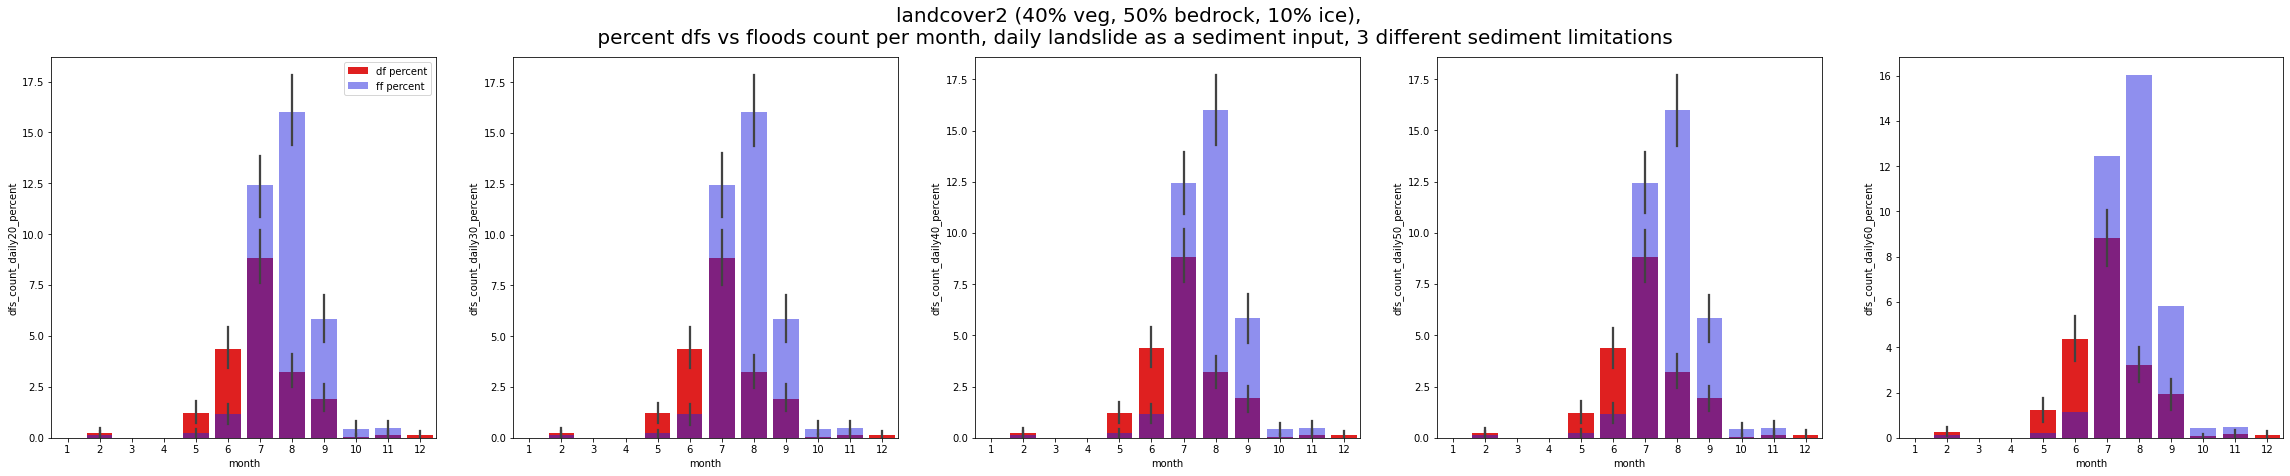

In [58]:
fig = plt.figure(figsize=(40, 7))#, layout = 'tight')
mosaic = fig.subplot_mosaic('''
                            abcde
                            ''')

sns.barplot(ax = mosaic['a'], data=lc1_daily, x="month", y="dfs_count_daily20_percent", color = 'red', label = 'df percent') #, hue = 'elevation_bin')
sns.barplot(ax = mosaic['b'], data=lc1_daily, x="month", y="dfs_count_daily30_percent", color = 'red') #, hue = 'elevation_bin')
sns.barplot(ax = mosaic['c'], data=lc1_daily, x="month", y="dfs_count_daily40_percent", color = 'red') #, hue = 'elevation_bin')
sns.barplot(ax = mosaic['d'], data=lc1_daily, x="month", y="dfs_count_daily50_percent", color = 'red')
sns.barplot(ax = mosaic['e'], data=lc1_daily, x="month", y="dfs_count_daily60_percent", color = 'red')


sns.barplot(ax = mosaic['a'], data=lc1_daily, x="month", y="ffs_count_daily20_percent", color = 'blue', alpha = 0.5, label = 'ff percent') #, hue = 'elevation_bin')
sns.barplot(ax = mosaic['b'], data=lc1_daily, x="month", y="ffs_count_daily30_percent", color = 'blue', alpha = 0.5) #, hue = 'elevation_bin')
sns.barplot(ax = mosaic['c'], data=lc1_daily, x="month", y="ffs_count_daily40_percent", color = 'blue', alpha = 0.5) #, hue = 'elevation_bin')
sns.barplot(ax = mosaic['d'], data=lc1_daily, x="month", y="ffs_count_daily50_percent", color = 'blue', alpha = 0.5)
sns.barplot(ax = mosaic['e'], data=lc1_daily, x="month", y="ffs_count_daily60_percent", color = 'blue', alpha = 0.5, estimator='mean', errorbar=None)

mosaic['a'].legend()
plt.suptitle('landcover2 (40% veg, 50% bedrock, 10% ice), \n percent dfs vs floods count per month, daily landslide as a sediment input, 3 different sediment limitations', fontsize = 20)


Text(0.5, 0.98, 'landcover2 (40% veg, 50% bedrock, 10% ice), \n percent dfs vs floods count per month, daily landslide as a sediment input, 3 different sediment limitations')

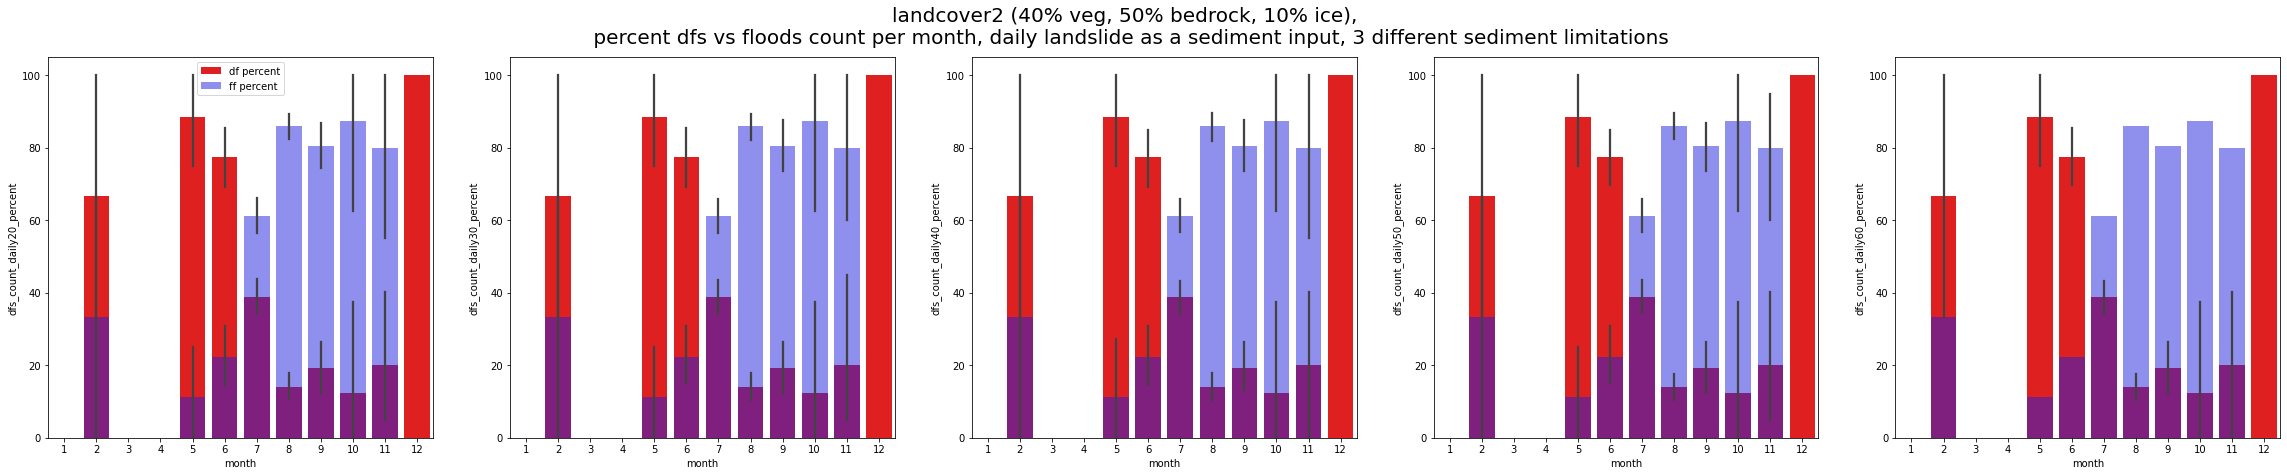

In [45]:
fig = plt.figure(figsize=(40, 7))#, layout = 'tight')
mosaic = fig.subplot_mosaic('''
                            abcde
                            ''')

sns.barplot(ax = mosaic['a'], data=lc2_daily, x="month", y="dfs_count_daily20_percent", color = 'red', label = 'df percent') #, hue = 'elevation_bin')
sns.barplot(ax = mosaic['b'], data=lc2_daily, x="month", y="dfs_count_daily30_percent", color = 'red') #, hue = 'elevation_bin')
sns.barplot(ax = mosaic['c'], data=lc2_daily, x="month", y="dfs_count_daily40_percent", color = 'red') #, hue = 'elevation_bin')
sns.barplot(ax = mosaic['d'], data=lc2_daily, x="month", y="dfs_count_daily50_percent", color = 'red')
sns.barplot(ax = mosaic['e'], data=lc2_daily, x="month", y="dfs_count_daily60_percent", color = 'red')


sns.barplot(ax = mosaic['a'], data=lc2_daily, x="month", y="ffs_count_daily20_percent", color = 'blue', alpha = 0.5, label = 'ff percent') #, hue = 'elevation_bin')
sns.barplot(ax = mosaic['b'], data=lc2_daily, x="month", y="ffs_count_daily30_percent", color = 'blue', alpha = 0.5) #, hue = 'elevation_bin')
sns.barplot(ax = mosaic['c'], data=lc2_daily, x="month", y="ffs_count_daily40_percent", color = 'blue', alpha = 0.5) #, hue = 'elevation_bin')
sns.barplot(ax = mosaic['d'], data=lc2_daily, x="month", y="ffs_count_daily50_percent", color = 'blue', alpha = 0.5)
sns.barplot(ax = mosaic['e'], data=lc2_daily, x="month", y="ffs_count_daily60_percent", color = 'blue', alpha = 0.5, estimator='mean', errorbar=None)

mosaic['a'].legend()
plt.suptitle('landcover2 (40% veg, 50% bedrock, 10% ice), \n percent dfs vs floods count per month, daily landslide as a sediment input, 3 different sediment limitations', fontsize = 20)


Text(0.5, 0.98, 'landcover3 (50% veg, 40% bedrock, 10% ice), \n percent dfs vs floods count per month, daily landslide as a sediment input, 3 different sediment limitations')

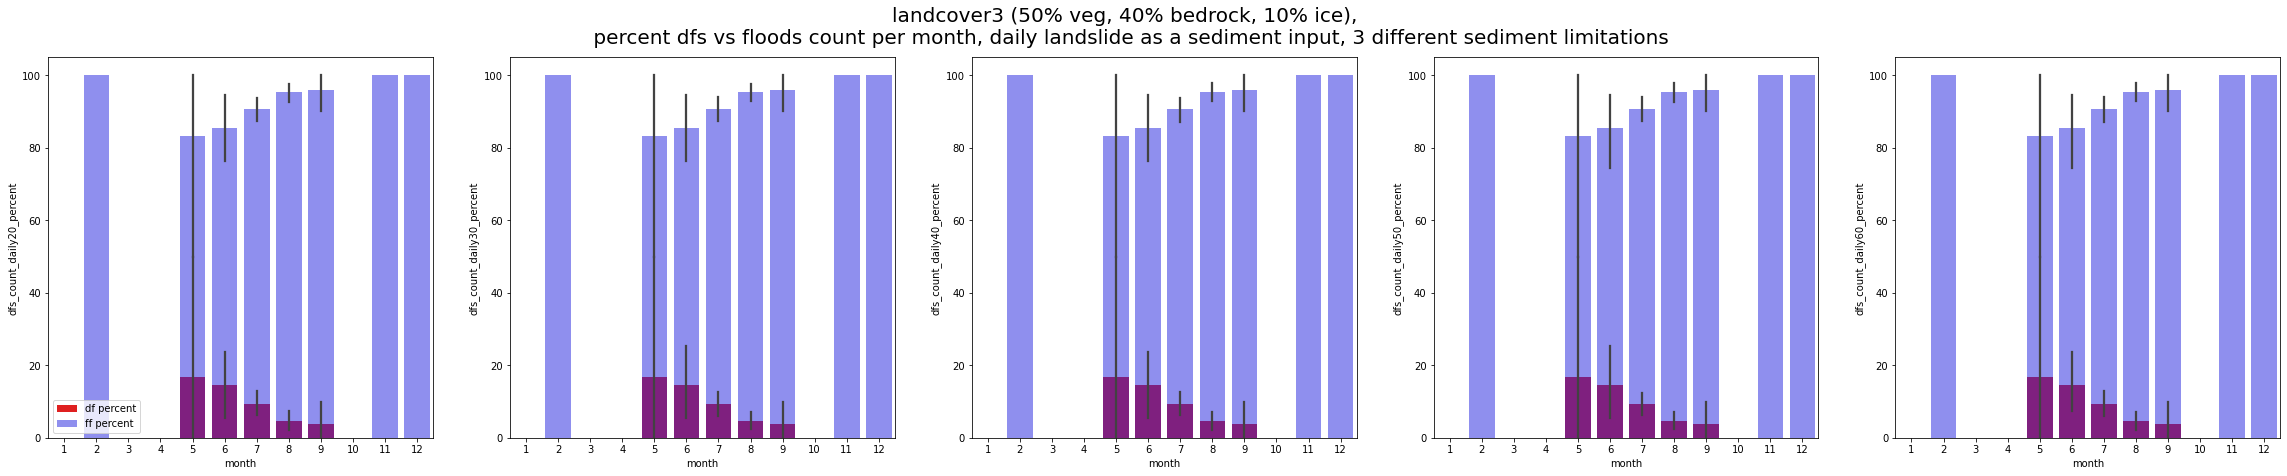

In [41]:
fig = plt.figure(figsize=(40, 7))#, layout = 'tight')
mosaic = fig.subplot_mosaic('''
                            abcde
                            ''')

sns.barplot(ax = mosaic['a'], data=lc3_daily, x="month", y="dfs_count_daily20_percent", color = 'red', label = 'df percent') #, hue = 'elevation_bin')
sns.barplot(ax = mosaic['b'], data=lc3_daily, x="month", y="dfs_count_daily30_percent", color = 'red') #, hue = 'elevation_bin')
sns.barplot(ax = mosaic['c'], data=lc3_daily, x="month", y="dfs_count_daily40_percent", color = 'red') #, hue = 'elevation_bin')
sns.barplot(ax = mosaic['d'], data=lc3_daily, x="month", y="dfs_count_daily50_percent", color = 'red')
sns.barplot(ax = mosaic['e'], data=lc3_daily, x="month", y="dfs_count_daily60_percent", color = 'red')


sns.barplot(ax = mosaic['a'], data=lc3_daily, x="month", y="ffs_count_daily20_percent", color = 'blue', alpha = 0.5, label = 'ff percent') #, hue = 'elevation_bin')
sns.barplot(ax = mosaic['b'], data=lc3_daily, x="month", y="ffs_count_daily30_percent", color = 'blue', alpha = 0.5) #, hue = 'elevation_bin')
sns.barplot(ax = mosaic['c'], data=lc3_daily, x="month", y="ffs_count_daily40_percent", color = 'blue', alpha = 0.5) #, hue = 'elevation_bin')
sns.barplot(ax = mosaic['d'], data=lc3_daily, x="month", y="ffs_count_daily50_percent", color = 'blue', alpha = 0.5)
sns.barplot(ax = mosaic['e'], data=lc3_daily, x="month", y="ffs_count_daily60_percent", color = 'blue', alpha = 0.5)

mosaic['a'].legend()
plt.suptitle('landcover3 (50% veg, 40% bedrock, 10% ice), \n percent dfs vs floods count per month, daily landslide as a sediment input, 3 different sediment limitations', fontsize = 20)


Text(0.5, 0.98, 'landcover4 (40% veg, 60% bedrock, 0% ice), \n percent dfs vs floods count per month, once per year landslide as a sediment input, 3 different sediment limitations')

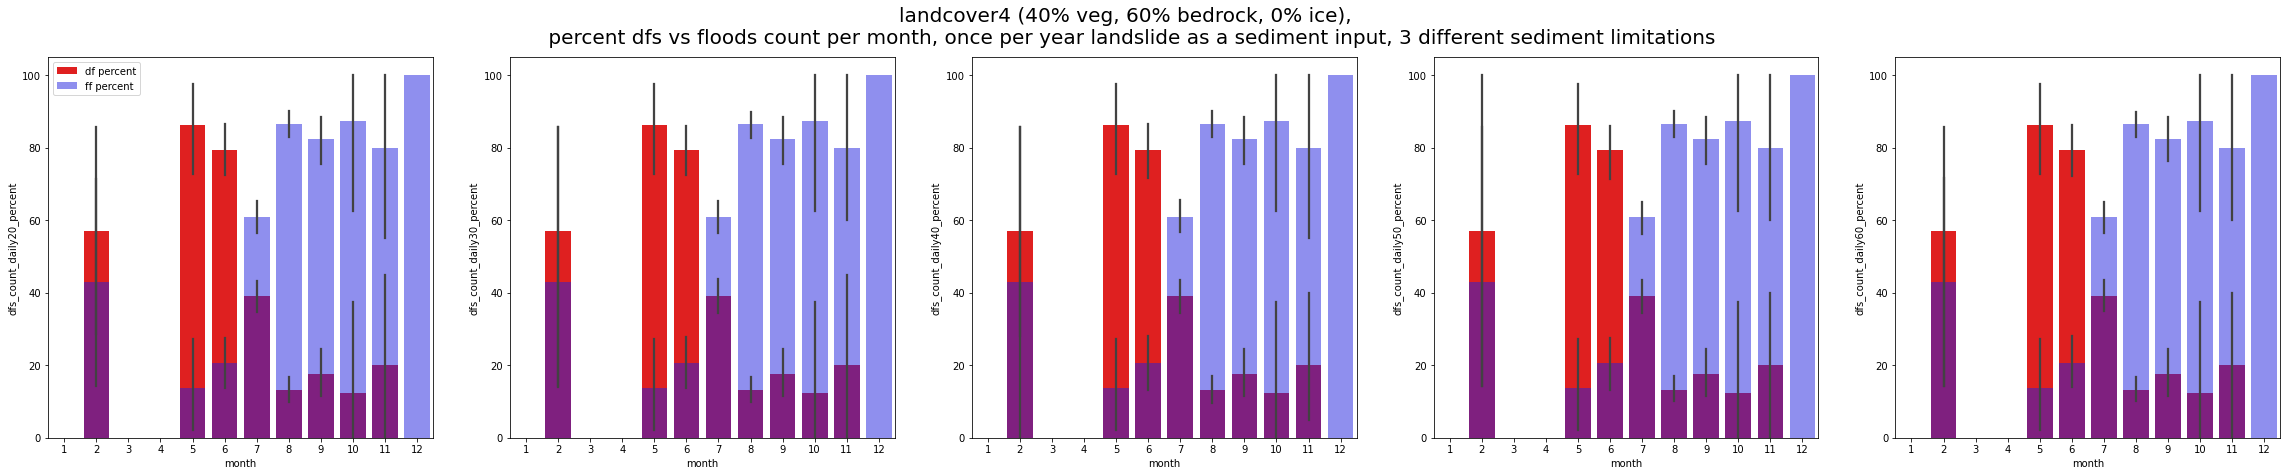

In [42]:
fig = plt.figure(figsize=(40, 7))#, layout = 'tight')
mosaic = fig.subplot_mosaic('''
                            abcde
                            ''')

sns.barplot(ax = mosaic['a'], data=lc4_daily, x="month", y="dfs_count_daily20_percent", color = 'red', label = 'df percent') #, hue = 'elevation_bin')
sns.barplot(ax = mosaic['b'], data=lc4_daily, x="month", y="dfs_count_daily30_percent", color = 'red') #, hue = 'elevation_bin')
sns.barplot(ax = mosaic['c'], data=lc4_daily, x="month", y="dfs_count_daily40_percent", color = 'red') #, hue = 'elevation_bin')
sns.barplot(ax = mosaic['d'], data=lc4_daily, x="month", y="dfs_count_daily50_percent", color = 'red')
sns.barplot(ax = mosaic['e'], data=lc4_daily, x="month", y="dfs_count_daily60_percent", color = 'red')


sns.barplot(ax = mosaic['a'], data=lc4_daily, x="month", y="ffs_count_daily20_percent", color = 'blue', alpha = 0.5, label = 'ff percent') #, hue = 'elevation_bin')
sns.barplot(ax = mosaic['b'], data=lc4_daily, x="month", y="ffs_count_daily30_percent", color = 'blue', alpha = 0.5) #, hue = 'elevation_bin')
sns.barplot(ax = mosaic['c'], data=lc4_daily, x="month", y="ffs_count_daily40_percent", color = 'blue', alpha = 0.5) #, hue = 'elevation_bin')
sns.barplot(ax = mosaic['d'], data=lc4_daily, x="month", y="ffs_count_daily50_percent", color = 'blue', alpha = 0.5)
sns.barplot(ax = mosaic['e'], data=lc4_daily, x="month", y="ffs_count_daily60_percent", color = 'blue', alpha = 0.5)

mosaic['a'].legend()
plt.suptitle('landcover4 (40% veg, 60% bedrock, 0% ice), \n percent dfs vs floods count per month, once per year landslide as a sediment input, 3 different sediment limitations', fontsize = 20)


# once

Text(0.5, 0.98, 'landcover2 (40% veg, 50% bedrock, 10% ice), \n percent dfs vs floods count per month, once per year landslide as a sediment input, 3 different sediment limitations')

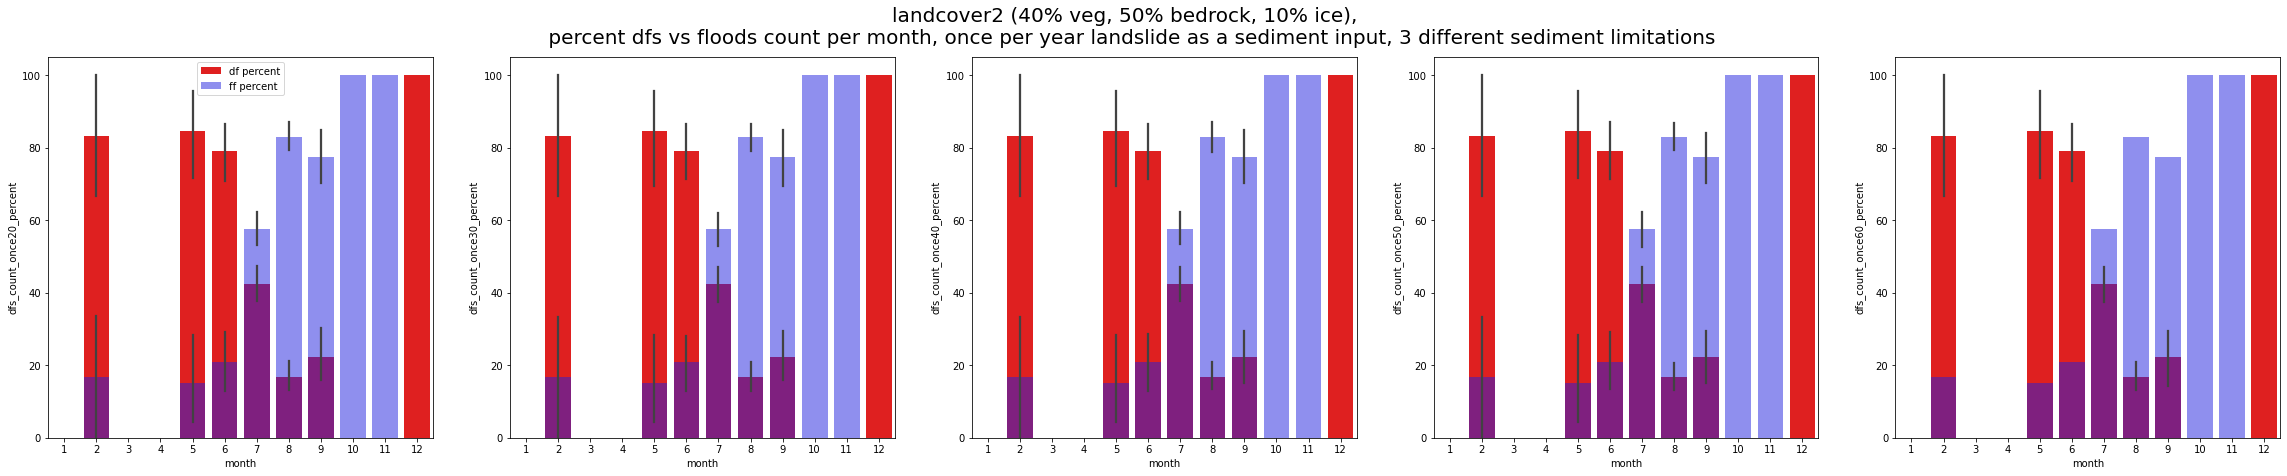

In [61]:
fig = plt.figure(figsize=(40, 7))#, layout = 'tight')
mosaic = fig.subplot_mosaic('''
                            abcde
                            ''')

sns.barplot(ax = mosaic['a'], data=lc1_once, x="month", y="dfs_count_once20_percent", color = 'red', label = 'df percent') #, hue = 'elevation_bin')
sns.barplot(ax = mosaic['b'], data=lc1_once, x="month", y="dfs_count_once30_percent", color = 'red') #, hue = 'elevation_bin')
sns.barplot(ax = mosaic['c'], data=lc1_once, x="month", y="dfs_count_once40_percent", color = 'red') #, hue = 'elevation_bin')
sns.barplot(ax = mosaic['d'], data=lc1_once, x="month", y="dfs_count_once50_percent", color = 'red')
sns.barplot(ax = mosaic['e'], data=lc1_once, x="month", y="dfs_count_once60_percent", color = 'red')


sns.barplot(ax = mosaic['a'], data=lc1_once, x="month", y="ffs_count_once20_percent", color = 'blue', alpha = 0.5, label = 'ff percent') #, hue = 'elevation_bin')
sns.barplot(ax = mosaic['b'], data=lc1_once, x="month", y="ffs_count_once30_percent", color = 'blue', alpha = 0.5) #, hue = 'elevation_bin')
sns.barplot(ax = mosaic['c'], data=lc1_once, x="month", y="ffs_count_once40_percent", color = 'blue', alpha = 0.5) #, hue = 'elevation_bin')
sns.barplot(ax = mosaic['d'], data=lc1_once, x="month", y="ffs_count_once50_percent", color = 'blue', alpha = 0.5)
sns.barplot(ax = mosaic['e'], data=lc1_once, x="month", y="ffs_count_once60_percent", color = 'blue', alpha = 0.5, estimator='mean', errorbar=None)

mosaic['a'].legend()
plt.suptitle('landcover1 ', fontsize = 20)


Text(0.5, 0.98, 'landcover2 ')

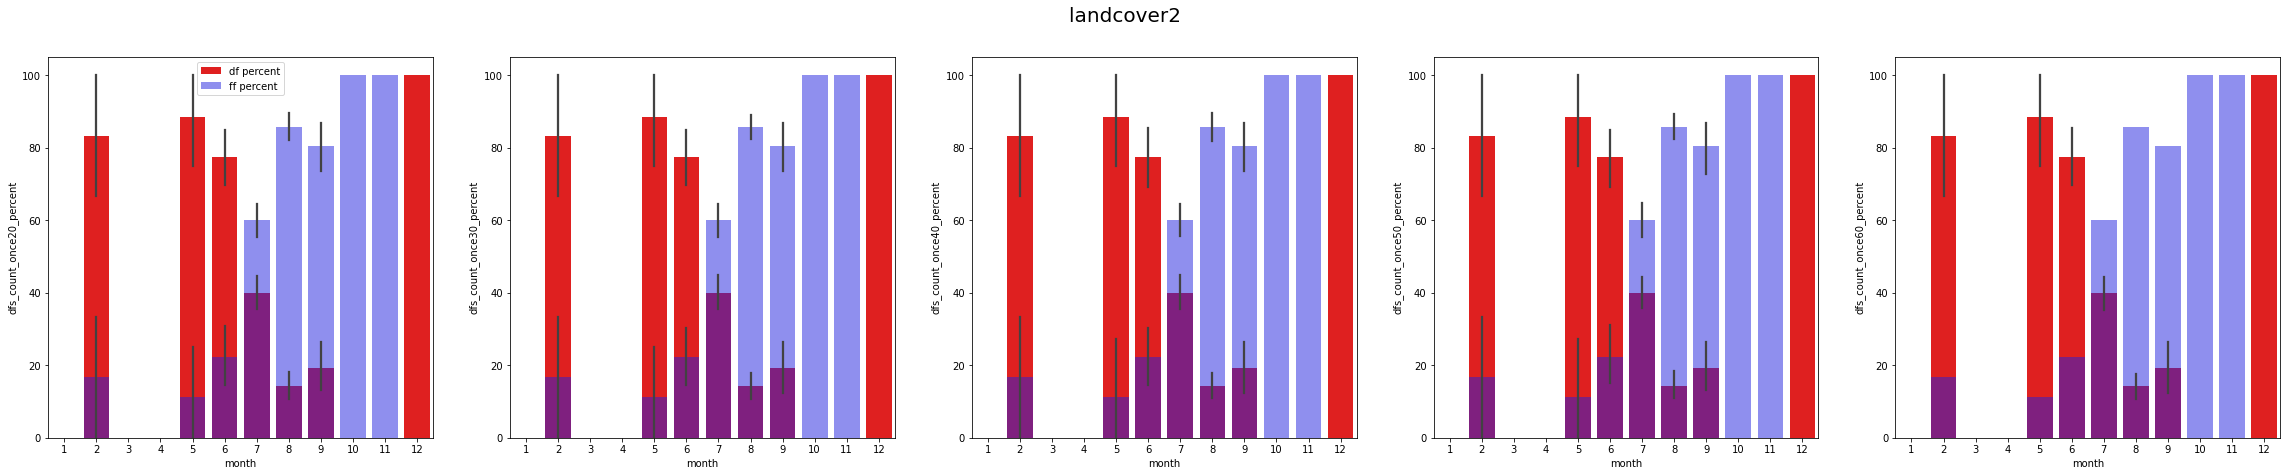

In [62]:
fig = plt.figure(figsize=(40, 7))#, layout = 'tight')
mosaic = fig.subplot_mosaic('''
                            abcde
                            ''')

sns.barplot(ax = mosaic['a'], data=lc2_once, x="month", y="dfs_count_once20_percent", color = 'red', label = 'df percent') #, hue = 'elevation_bin')
sns.barplot(ax = mosaic['b'], data=lc2_once, x="month", y="dfs_count_once30_percent", color = 'red') #, hue = 'elevation_bin')
sns.barplot(ax = mosaic['c'], data=lc2_once, x="month", y="dfs_count_once40_percent", color = 'red') #, hue = 'elevation_bin')
sns.barplot(ax = mosaic['d'], data=lc2_once, x="month", y="dfs_count_once50_percent", color = 'red')
sns.barplot(ax = mosaic['e'], data=lc2_once, x="month", y="dfs_count_once60_percent", color = 'red')


sns.barplot(ax = mosaic['a'], data=lc2_once, x="month", y="ffs_count_once20_percent", color = 'blue', alpha = 0.5, label = 'ff percent') #, hue = 'elevation_bin')
sns.barplot(ax = mosaic['b'], data=lc2_once, x="month", y="ffs_count_once30_percent", color = 'blue', alpha = 0.5) #, hue = 'elevation_bin')
sns.barplot(ax = mosaic['c'], data=lc2_once, x="month", y="ffs_count_once40_percent", color = 'blue', alpha = 0.5) #, hue = 'elevation_bin')
sns.barplot(ax = mosaic['d'], data=lc2_once, x="month", y="ffs_count_once50_percent", color = 'blue', alpha = 0.5)
sns.barplot(ax = mosaic['e'], data=lc2_once, x="month", y="ffs_count_once60_percent", color = 'blue', alpha = 0.5, estimator='mean', errorbar=None)

mosaic['a'].legend()
plt.suptitle('landcover2 ', fontsize = 20)

Text(0.5, 0.98, 'landcover3 ')

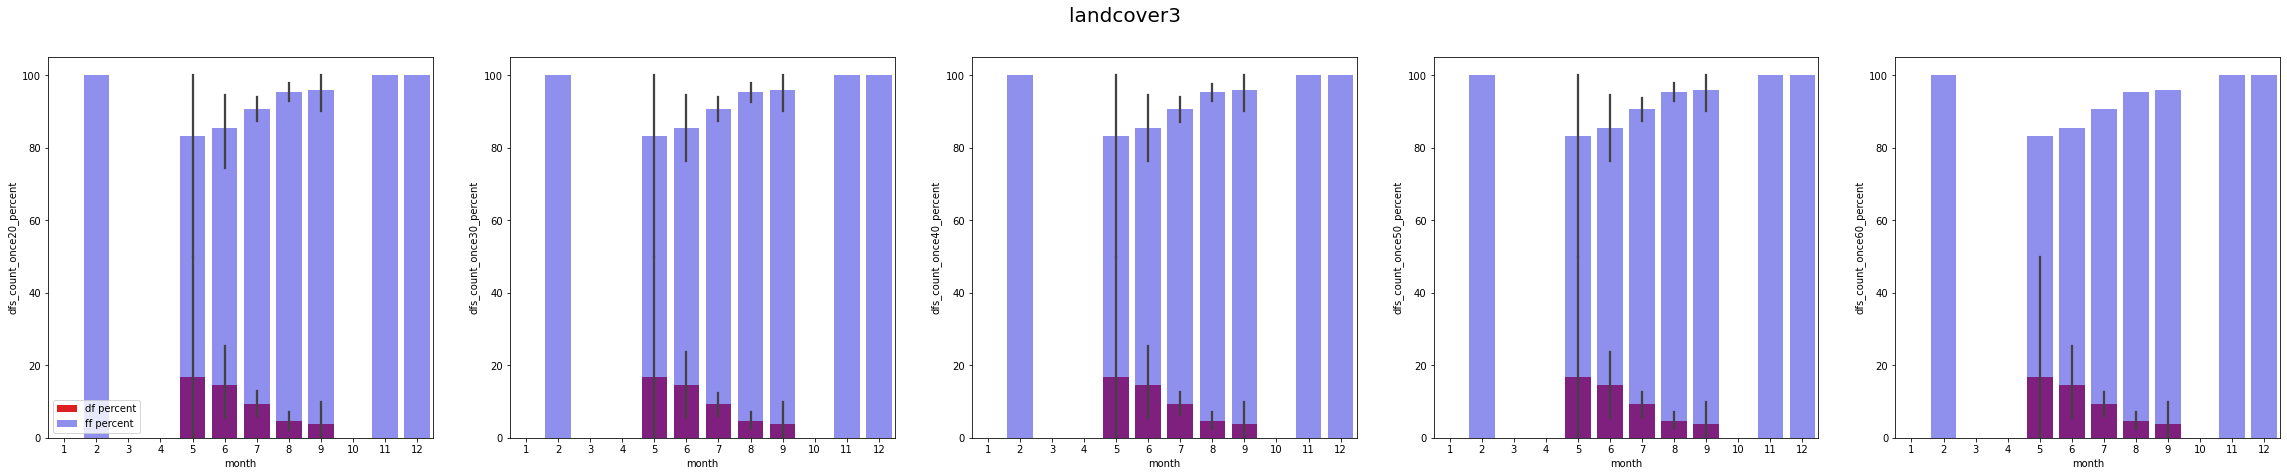

In [63]:
fig = plt.figure(figsize=(40, 7))#, layout = 'tight')
mosaic = fig.subplot_mosaic('''
                            abcde
                            ''')

sns.barplot(ax = mosaic['a'], data=lc3_once, x="month", y="dfs_count_once20_percent", color = 'red', label = 'df percent') #, hue = 'elevation_bin')
sns.barplot(ax = mosaic['b'], data=lc3_once, x="month", y="dfs_count_once30_percent", color = 'red') #, hue = 'elevation_bin')
sns.barplot(ax = mosaic['c'], data=lc3_once, x="month", y="dfs_count_once40_percent", color = 'red') #, hue = 'elevation_bin')
sns.barplot(ax = mosaic['d'], data=lc3_once, x="month", y="dfs_count_once50_percent", color = 'red')
sns.barplot(ax = mosaic['e'], data=lc3_once, x="month", y="dfs_count_once60_percent", color = 'red')


sns.barplot(ax = mosaic['a'], data=lc3_once, x="month", y="ffs_count_once20_percent", color = 'blue', alpha = 0.5, label = 'ff percent') #, hue = 'elevation_bin')
sns.barplot(ax = mosaic['b'], data=lc3_once, x="month", y="ffs_count_once30_percent", color = 'blue', alpha = 0.5) #, hue = 'elevation_bin')
sns.barplot(ax = mosaic['c'], data=lc3_once, x="month", y="ffs_count_once40_percent", color = 'blue', alpha = 0.5) #, hue = 'elevation_bin')
sns.barplot(ax = mosaic['d'], data=lc3_once, x="month", y="ffs_count_once50_percent", color = 'blue', alpha = 0.5)
sns.barplot(ax = mosaic['e'], data=lc3_once, x="month", y="ffs_count_once60_percent", color = 'blue', alpha = 0.5, estimator='mean', errorbar=None)

mosaic['a'].legend()
plt.suptitle('landcover3 ', fontsize = 20)

Text(0.5, 0.98, 'landcover3 ')

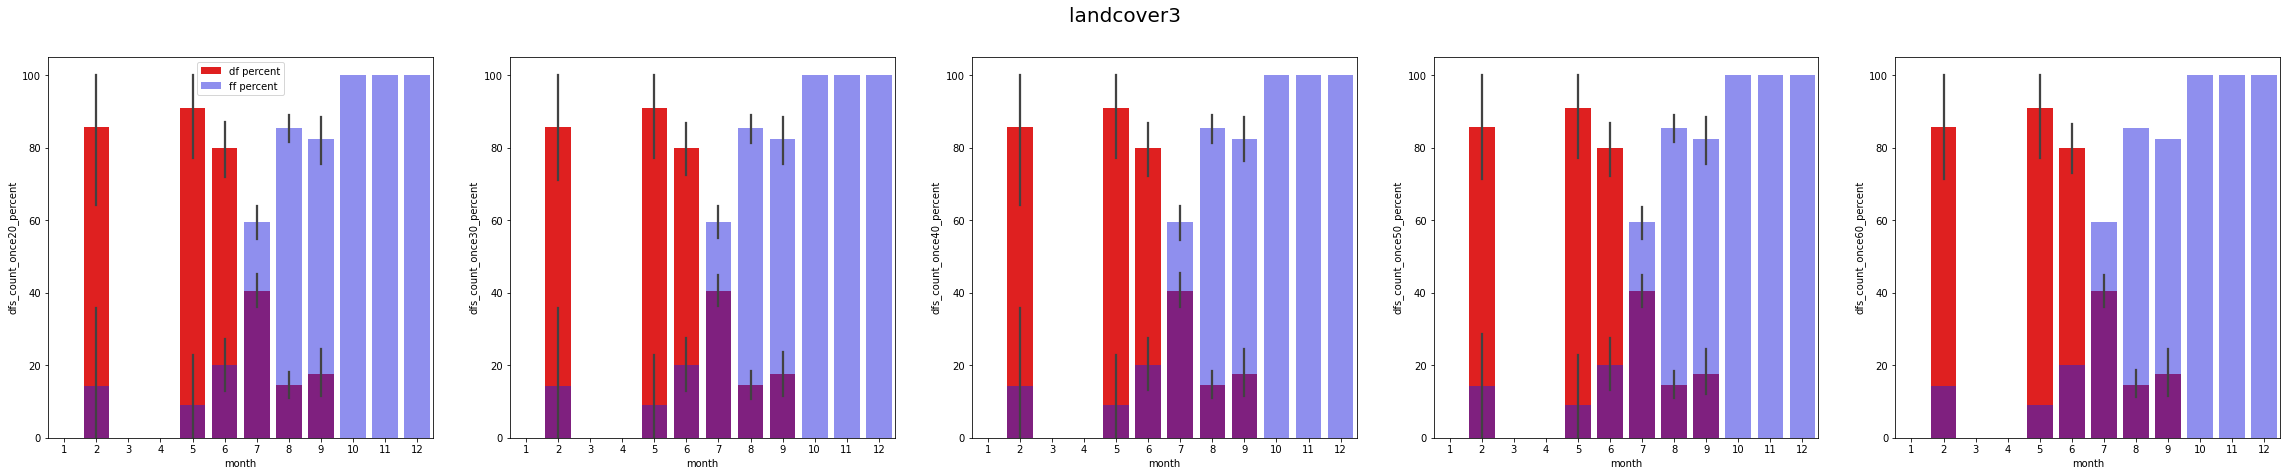

In [64]:
fig = plt.figure(figsize=(40, 7))#, layout = 'tight')
mosaic = fig.subplot_mosaic('''
                            abcde
                            ''')

sns.barplot(ax = mosaic['a'], data=lc4_once, x="month", y="dfs_count_once20_percent", color = 'red', label = 'df percent') #, hue = 'elevation_bin')
sns.barplot(ax = mosaic['b'], data=lc4_once, x="month", y="dfs_count_once30_percent", color = 'red') #, hue = 'elevation_bin')
sns.barplot(ax = mosaic['c'], data=lc4_once, x="month", y="dfs_count_once40_percent", color = 'red') #, hue = 'elevation_bin')
sns.barplot(ax = mosaic['d'], data=lc4_once, x="month", y="dfs_count_once50_percent", color = 'red')
sns.barplot(ax = mosaic['e'], data=lc4_once, x="month", y="dfs_count_once60_percent", color = 'red')


sns.barplot(ax = mosaic['a'], data=lc4_once, x="month", y="ffs_count_once20_percent", color = 'blue', alpha = 0.5, label = 'ff percent') #, hue = 'elevation_bin')
sns.barplot(ax = mosaic['b'], data=lc4_once, x="month", y="ffs_count_once30_percent", color = 'blue', alpha = 0.5) #, hue = 'elevation_bin')
sns.barplot(ax = mosaic['c'], data=lc4_once, x="month", y="ffs_count_once40_percent", color = 'blue', alpha = 0.5) #, hue = 'elevation_bin')
sns.barplot(ax = mosaic['d'], data=lc4_once, x="month", y="ffs_count_once50_percent", color = 'blue', alpha = 0.5)
sns.barplot(ax = mosaic['e'], data=lc4_once, x="month", y="ffs_count_once60_percent", color = 'blue', alpha = 0.5, estimator='mean', errorbar=None)

mosaic['a'].legend()
plt.suptitle('landcover3 ', fontsize = 20)

Text(0.5, 0.98, 'landcover3 (50% veg, 40% bedrock, 10% ice), \n percent dfs vs floods count per month, once per year landslide as a sediment input, 3 different sediment limitations')

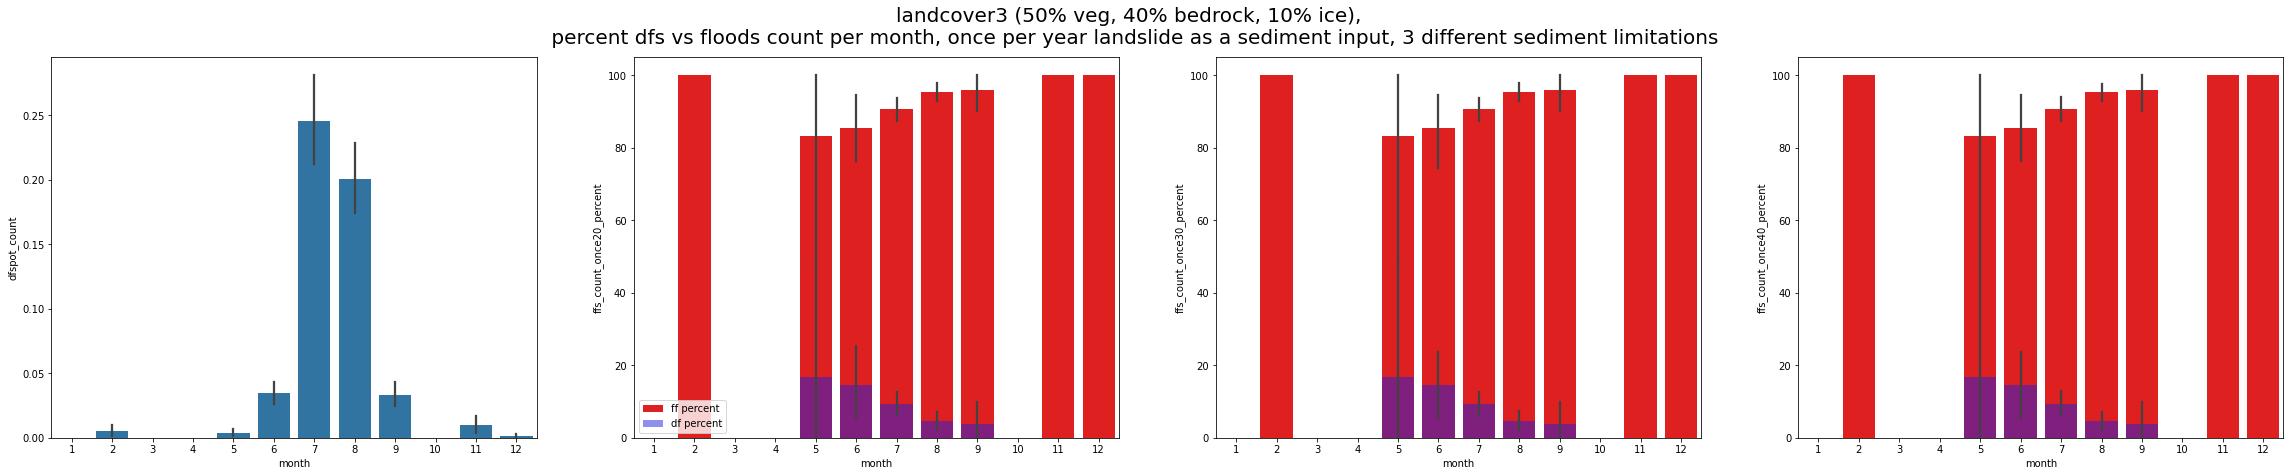

# difference per landcover 

- take "reference" landcover as 100% and calculate the % of the others 



In [65]:
dfs_potential = pd.DataFrame()

dfs_potential['year'] = lc2_daily.year
dfs_potential['month'] = lc2_daily.month
dfs_potential['elevation'] = lc2_daily.elevation
dfs_potential['elevation_bin'] = lc2_daily.elevation_bin
dfs_potential['id'] = lc2_daily.id


dfs_potential['dfspot_count_lc1']=lc1_daily.dfspot_count
dfs_potential['dfspot_count_lc2']=lc2_daily.dfspot_count
dfs_potential['dfspot_count_lc3']=lc3_daily.dfspot_count
dfs_potential['dfspot_count_lc4']=lc4_daily.dfspot_count


dfs_potential_percent = dfs_potential.copy()

In [66]:
def calculate_percentage(df, reference_col, target_cols):
    # Apply a function to each row to calculate the percentages
    df[reference_col] = df[reference_col].replace(0, np.nan)
    df[target_cols] = df.apply(lambda row: row[target_cols] / row[reference_col] * 100, axis=1)
    return df

# Specify 'col1' as the reference column and 'col2', 'col3', and 'col4' as the target columns
dfs_potential_percent = calculate_percentage(dfs_potential_percent, reference_col='dfspot_count_lc4', target_cols=['dfspot_count_lc1', 'dfspot_count_lc2', 'dfspot_count_lc3'])


In [67]:
# dfs_potential_percent

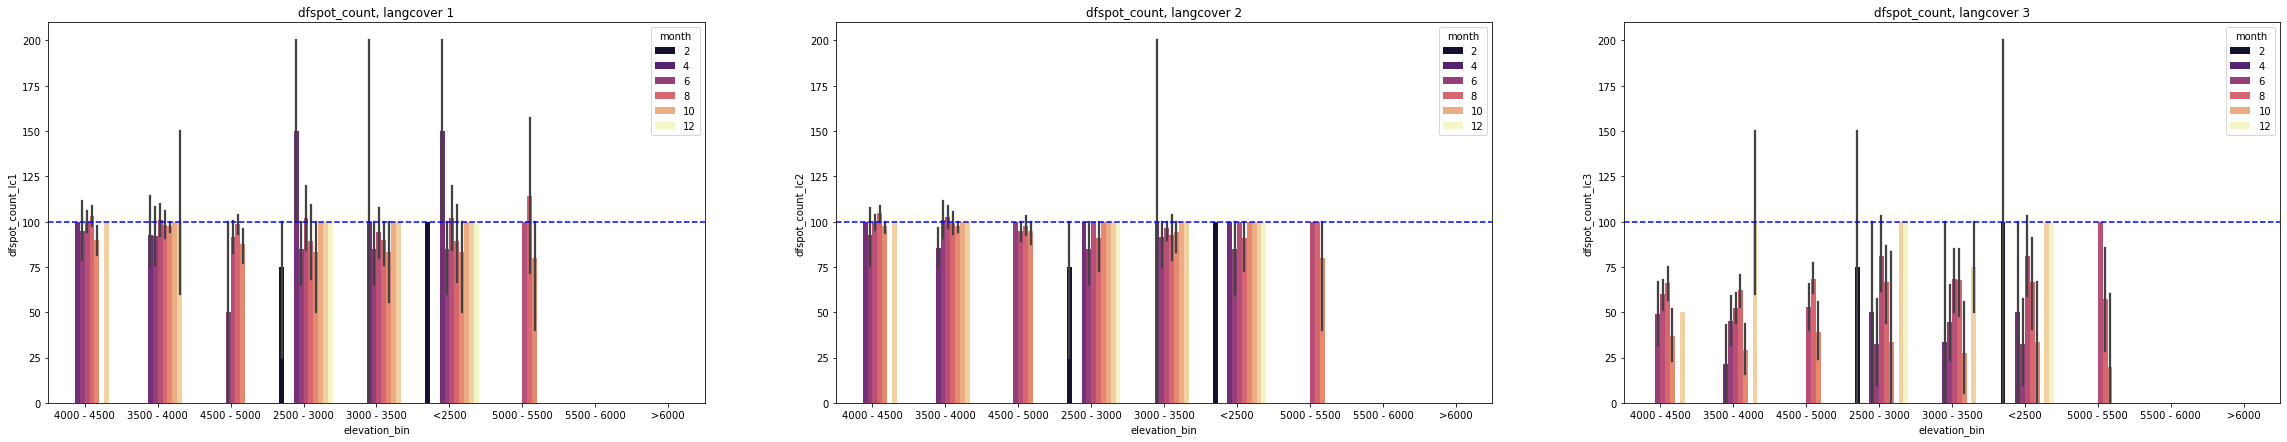

In [72]:
fig = plt.figure(figsize=(40, 7))
mosaic = fig.subplot_mosaic('''
                            abc
                            ''')

sns.barplot(ax = mosaic['a'], data=dfs_potential_percent, x="elevation_bin", y="dfspot_count_lc1", palette = 'magma', hue = 'month')#, label = 'ff percent') #, hue = 'elevation_bin')
sns.barplot(ax = mosaic['b'], data=dfs_potential_percent, x="elevation_bin", y="dfspot_count_lc2", palette = 'magma', hue = 'month') #, hue = 'elevation_bin')
sns.barplot(ax = mosaic['c'], data=dfs_potential_percent, x="elevation_bin", y="dfspot_count_lc3", palette = 'magma', hue = 'month') #, hue = 'elevation_bin')

# Set titles for the individual subplots
mosaic['a'].set_title('dfspot_count, langcover 1')
mosaic['b'].set_title('dfspot_count, langcover 2')
mosaic['c'].set_title('dfspot_count, langcover 3')

mosaic['a'].axhline(y=100, color='blue', linestyle='--')#, linewidth=2)
mosaic['b'].axhline(y=100, color='blue', linestyle='--')#, linewidth=2)
mosaic['c'].axhline(y=100, color='blue', linestyle='--')#, linewidth=2)


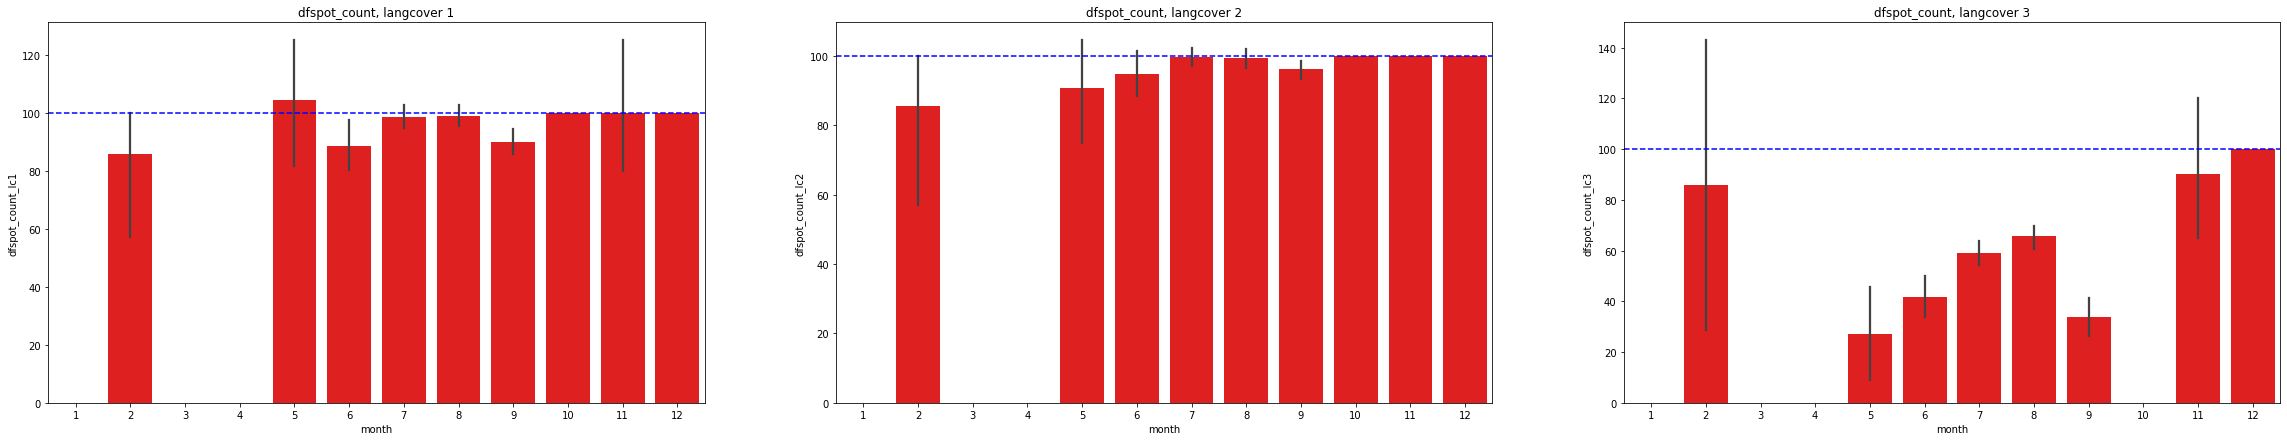

In [73]:
fig = plt.figure(figsize=(40, 7))#, layout = 'tight')
mosaic = fig.subplot_mosaic('''
                            abc
                            ''')

sns.barplot(ax = mosaic['a'], data=dfs_potential_percent, x="month", y="dfspot_count_lc1", color = 'red')#, hue = 'month')#, label = 'ff percent') #, hue = 'elevation_bin')
sns.barplot(ax = mosaic['b'], data=dfs_potential_percent, x="month", y="dfspot_count_lc2", color = 'red')#, hue = 'month') #, hue = 'elevation_bin')
sns.barplot(ax = mosaic['c'], data=dfs_potential_percent, x="month", y="dfspot_count_lc3", color = 'red')#, hue = 'month') #, hue = 'elevation_bin')

# # Set titles for the individual subplots
mosaic['a'].set_title('dfspot_count, langcover 1')
mosaic['b'].set_title('dfspot_count, langcover 2')
mosaic['c'].set_title('dfspot_count, langcover 3')

mosaic['a'].axhline(y=100, color='blue', linestyle='--')#, linewidth=2)
mosaic['b'].axhline(y=100, color='blue', linestyle='--')#, linewidth=2)
mosaic['c'].axhline(y=100, color='blue', linestyle='--')#, linewidth=2)


In [ ]:
fig = plt.figure(figsize=(40, 7))#, layout = 'tight')
mosaic = fig.subplot_mosaic('''
                            abcd
                            ''')

# First subplot
sns.barplot(ax = mosaic['a'], data=lc3_daily, x="month", y="dfspot_count")

# Second subplot - place bars next to each other
sns.barplot(ax = mosaic['b'], data=lc3_daily, x="month", y="ffs_count_daily20_percent", color = 'red', label = 'ff percent', dodge=True)
sns.barplot(ax = mosaic['b'], data=lc1_daily, x="month", y="dfs_count_daily20_percent", color = 'blue', alpha = 0.5, label = 'df percent', dodge=True)

# Third subplot - same for the other percentages
sns.barplot(ax = mosaic['c'], data=lc3_daily, x="month", y="ffs_count_daily30_percent", color = 'red', dodge=True)
sns.barplot(ax = mosaic['c'], data=lc1_daily, x="month", y="dfs_count_daily30_percent", color = 'blue', alpha = 0.5, dodge=True)

# Fourth subplot - same for the other percentages
sns.barplot(ax = mosaic['d'], data=lc3_daily, x="month", y="ffs_count_daily40_percent", color = 'red', dodge=True)
sns.barplot(ax = mosaic['d'], data=lc1_daily, x="month", y="dfs_count_daily40_percent", color = 'blue', alpha = 0.5, dodge=True)

# Add legend and title
mosaic['b'].legend()
plt.suptitle('landcover3 (50% veg, 40% bedrock, 10% ice, \n percent dfs vs floods count per month, daily landslide as a sediment input, 3 different sediment limitations', fontsize = 20)

plt.show()
